# Introduction
In Part IV, we will use machine learning techniques to predict the depression score of a student. The process goes like this: 

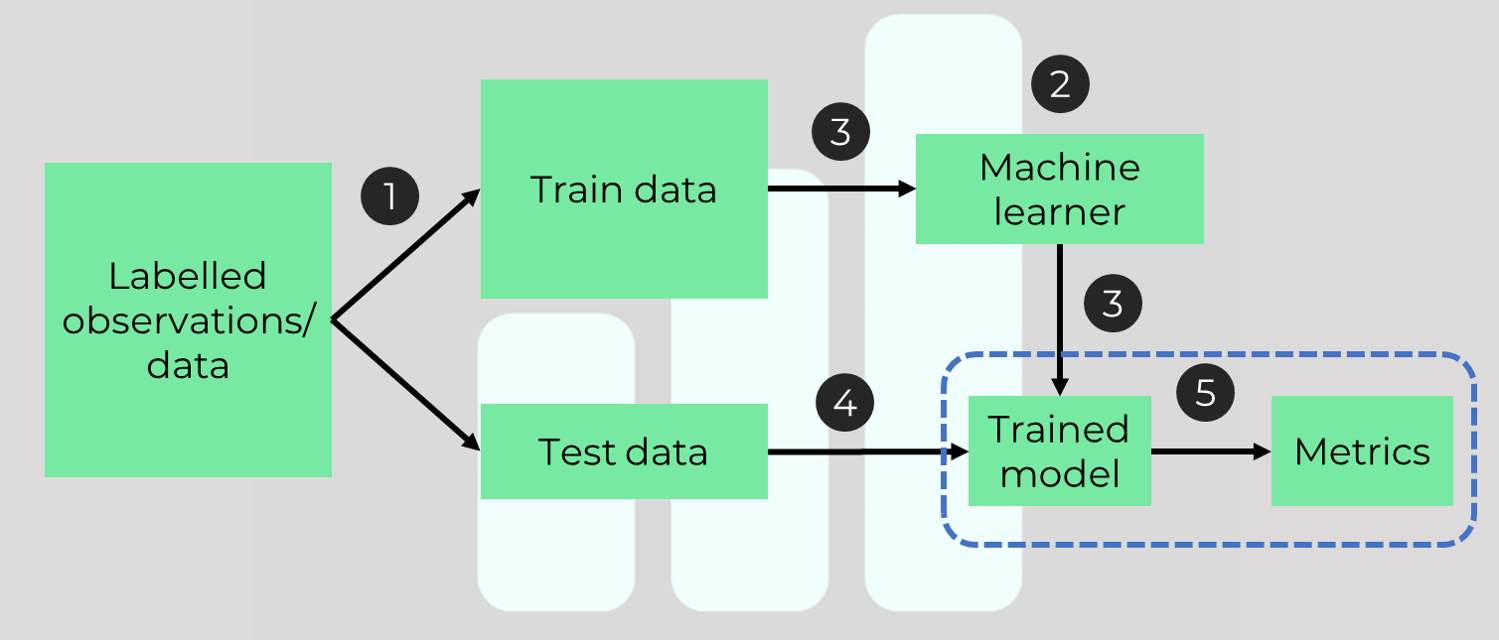

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
1. pandas as pd
2. numpy as np

In [ ]:
# Step 1: Import your machine learning libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2: Read the three CSVs from Part III
We'll be working with with the three CSVs that we exported from Part III. 

Reminder, we exported a:
1. CSV containing only numerical data
2. CSV containing only dummified categorical data
3. CSV containing both

In [ ]:
# Step 2: Read your CSV (don't forget to preview and check)

In [2]:
df_numeric=pd.read_csv("Cleaned_Numeric.csv")

In [3]:
df_object=pd.read_csv("Cleaned_Objecttype.csv")

In [4]:
df_final=pd.read_csv("Cleaned_For_ML.csv")

### Step 3: Import the machine learning libraries for regression
We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. We will now import the libraries that we need for machine learning.

We will start off with regression modelling, so let's import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyRegressor - sklearn.dummy
3. LinearRegression - sklearn.linear_model
3. DecisionTreeRegressor - sklearn.tree
4. RandomForestRegressor - sklearn.ensemble
5. mean_squared_error - sklearn.metrics
6. matplotlib.pyplot as plt

In [ ]:
# Step 3: Import the machine learning libraries

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Machine learning modelling (Regression)
The author of the research used a linear regression to predict the logarithm of ToDep (Total score of depression measured by PHQ-9) based on ToAS (Total score of Acculturative Stress) and ToSC (Total social connectedness measured by SCS). 

Sure we can do better? Let's use ML instead to predict our ToDep score. 

### Step 4: Prepare the independent and dependent variables
First off, <font color = 'red'>let's use our numerical DataFrame first for our model training.</font>

- Independent variables: Declare a variable, and assign your numerical DataFrame with 'ToDep' and 'Age_Cate' dropped (we don't need Age_Cate and it's an extra column)

- Dependent variable: Declare a variable and assign the column values of 'ToDep' 

In [ ]:
# Step 4: Prepare the independent and dependent variables

In [6]:
df_numeric.columns

Index(['Unnamed: 0', 'Age', 'Age_cate', 'Stay', 'Japanese', 'English', 'ToDep',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet'],
      dtype='object')

In [9]:
X_numeric=df_numeric[['Age', 'Stay', 'Japanese', 'English', 
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet']]
y_numeric=df_numeric[['ToDep']]

In [10]:
X_numeric

,Age,Stay,Japanese,English,ToSC,APD,AHome,APH,Afear,ACS,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,5.0,3.0,5.0,34.0,23.0,9.0,11.0,8.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,1.0,4.0,4.0,48.0,8.0,7.0,5.0,4.0,3.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,6.0,4.0,4.0,41.0,13.0,4.0,7.0,6.0,4.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,1.0,2.0,3.0,37.0,16.0,10.0,10.0,8.0,6.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,1.0,1.0,3.0,37.0,15.0,12.0,5.0,8.0,7.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,4.0,5.0,4.0,27.0,16.0,9.0,10.0,8.0,7.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,4.0,48.0,8.0,10.0,5.0,4.0,3.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,1.0,5.0,3.0,47.0,8.0,7.0,5.0,5.0,3.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,1.0,5.0,3.0,43.0,8.0,12.0,5.0,4.0,3.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [11]:
y_numeric

,ToDep
0,0.0
1,2.0
2,2.0
3,3.0
4,3.0
...,...
263,8.0
264,2.0
265,9.0
266,1.0


### Step 5: Split your indepedent and dependent variables into train and test sets¶
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function. 

In [ ]:
# Step 5: Split your variables into train and test sets

In [12]:
X_numeric_train,X_numeric_test,y_numeric_train,y_numeric_test=train_test_split(X_numeric,y_numeric,test_size= 0.2, random_state= 123)

### Step 6: Train your machine learning model
After you've split your data, machine learning begins.

This is what you'll need to do:

1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

We strongly recommend starting with DummyRegressor to establish a baseline for your predictions.

Also, the recommended readings will be very helpful.

In [ ]:
# Step 6a: Declare a variable to store the model (DummyRegressor)

# Step 6b: Fit your train dataset

# Step 6c: Declare a variable and store your predictions that you make with your model using X test data

In [13]:
dummy_regr=DummyRegressor(strategy="mean")
dummy_regr.fit(X_numeric_train,y_numeric_train)
dummy_numerical_predict=dummy_regr.predict(X_numeric_test)

### Step 7: Assess the prediction by the model
After you're done predicting, you will need to assess the predictions. To do this, you will need to print out:
1. root mean squared error (RMSE)
2. plot a scatterplot between the actual and predicted ToDep values

RMSE is the standard deviation of the prediction errors and measures how far from the regression line data points are. The lower the RMSE the better. 

You will need to use numpy sqrt method to square root the mean squared error results.

We will also plot a scatterplot to see how well our predictions agree with actual values. 

In [ ]:
# Step 7a: Print the square root of mean_squared_error of your test and dummy prediction

# Step 7b: Plot a scatterplot between test and prediction values

In [22]:
print("Room Mean Squarred Error for Dummy Regressor",np.sqrt(mean_squared_error(y_numeric_test,dummy_numerical_predict)))

Room Mean Squarred Error for Dummy Regressor 5.1132152908325965


In [23]:
dummy_numerical_predict

array([8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084, 8.09813084,
       8.09813084, 8.09813084, 8.09813084, 8.09813084])

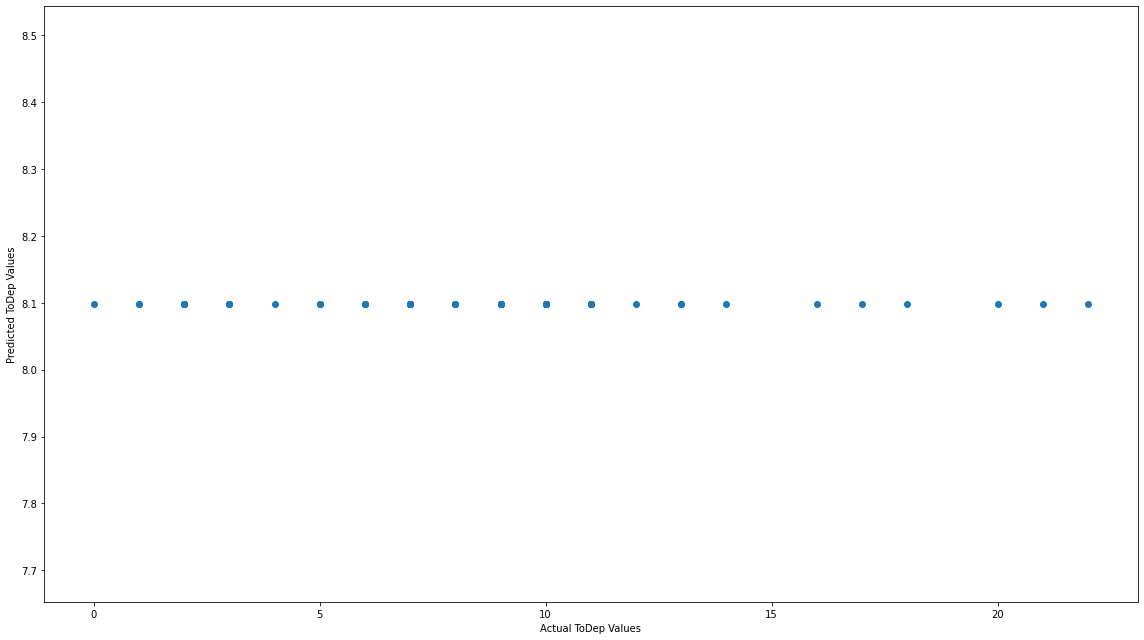

In [24]:
plt.figure(figsize=(16, 9))
plt.scatter(y_numeric_test, dummy_numerical_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 8: Train and test a LinearRegression model
Now that we have established a baseline using DummyRegressor, we will now train a proper model for predicting the quality data. 

We will repeat Steps 6-7, but with a LinearRegression model. 

In [ ]:
# Step 8a: Declare a variable to store the LinearRegression model

# Step 8b: Fit your train dataset

# Step 8c: Declare a variable and store your predictions that you make with your model using X test data

# Step 8d: Print the RMSE for y test and the predictions

# Step 8e: Plot a scatterplot between test and prediction values

In [21]:
Linear_regr=LinearRegression()
Linear_regr.fit(X_numeric_train,y_numeric_train)
Linear_numerical_predict=Linear_regr.predict(X_numeric_test)

In [25]:
print("Room Mean Squarred Error for Linear Regressor",np.sqrt(mean_squared_error(y_numeric_test,Linear_numerical_predict)))

Room Mean Squarred Error for Linear Regressor 5.022985949189127


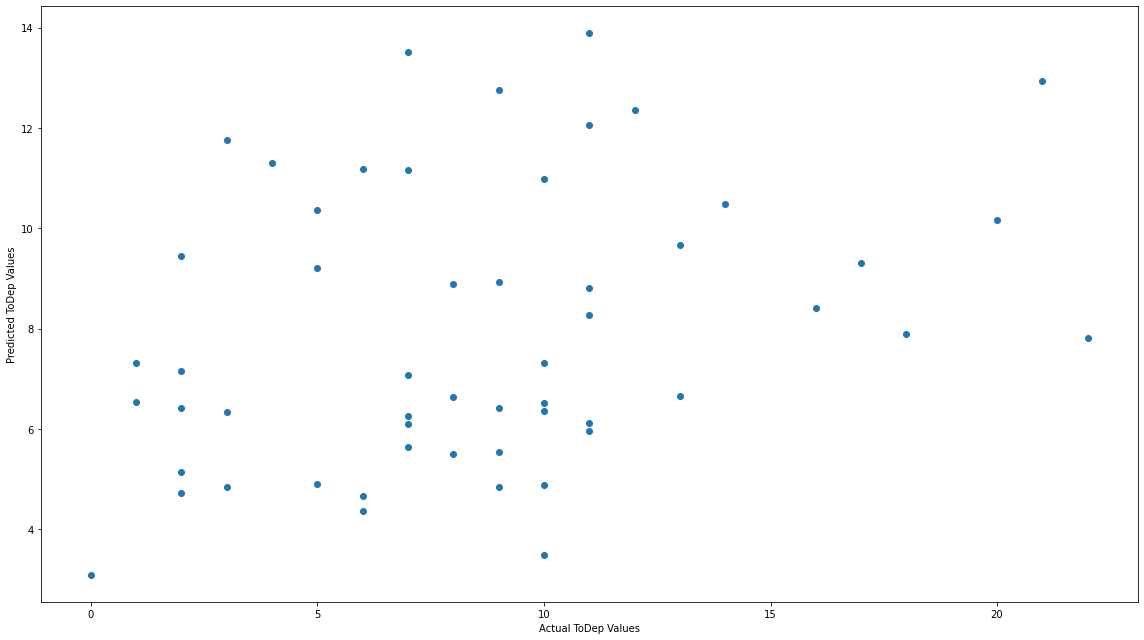

In [26]:
plt.figure(figsize=(16, 9))
plt.scatter(y_numeric_test, Linear_numerical_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 9: Train and test a DecisionTreeModel
LinearRegression model gave pretty good results. Let's try a DecisionTreeRegressor instead. 

You'll be surprised by the results.

In [ ]:
# Step 9a: Declare a variable to store the DecisionTreeRegressor

# Step 9b: Fit your train dataset

# Step 9c: Declare a variable and store your predictions that you make with your model using X test data

# Step 9d: Print the RMSE for y test and the predictions

# Step 9e: Plot a scatterplot between test and prediction values

In [27]:
Decisiontree_regr=DecisionTreeRegressor()
Decisiontree_regr.fit(X_numeric_train,y_numeric_train)
Decisiontree_numerical_predict=Decisiontree_regr.predict(X_numeric_test)

In [28]:
print("Room Mean Squarred Error for Decision Tree Regressor",np.sqrt(mean_squared_error(y_numeric_test,Decisiontree_numerical_predict)))

Room Mean Squarred Error for Decision Tree Regressor 5.854722690083432


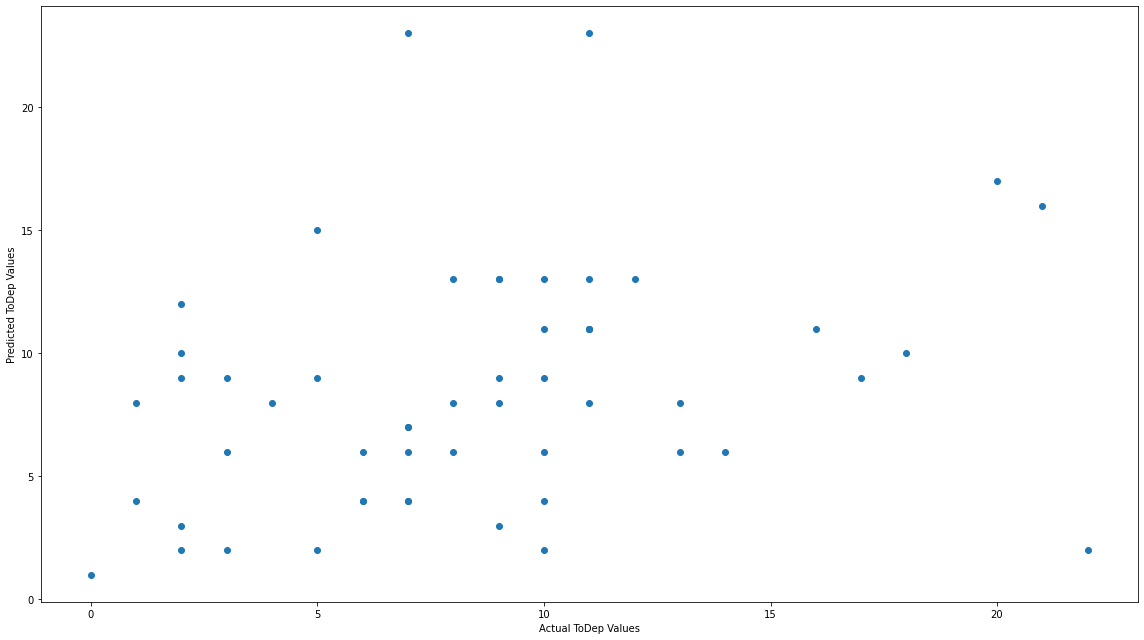

In [29]:
plt.figure(figsize=(16, 9))
plt.scatter(y_numeric_test, Decisiontree_numerical_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 10: Train and test a RandomForestRegressor
Surprised by the results? If you did everything correctly it will look like your LinearModelRegression did better than your DecisionTreeRegressor. It happens so don't fret - it's important to test all kinds of models. 

Let's try a RandomForestRegressor - it should be better. 

In [ ]:
# Step 10a: Declare a variable to store the RandomForestRegressor

# Step 10b: Fit your train dataset

# Step 10c: Declare a variable and store your predictions that you make with your model using X test data

# Step 10d: Print the RMSE for y test and the predictions

# Step 10e: Plot a scatterplot between test and prediction values

In [30]:
Randomforest_regr=RandomForestRegressor()
Randomforest_regr.fit(X_numeric_train,y_numeric_train)
Randomforest_numerical_predict=Randomforest_regr.predict(X_numeric_test)

C:\Users\sobee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [49]:
print("Room Mean Squarred Error for Random Forest Regressor",np.sqrt(mean_squared_error(y_numeric_test,Randomforest_numerical_predict)))

Room Mean Squarred Error for Random Forest Regressor 5.252568154933567


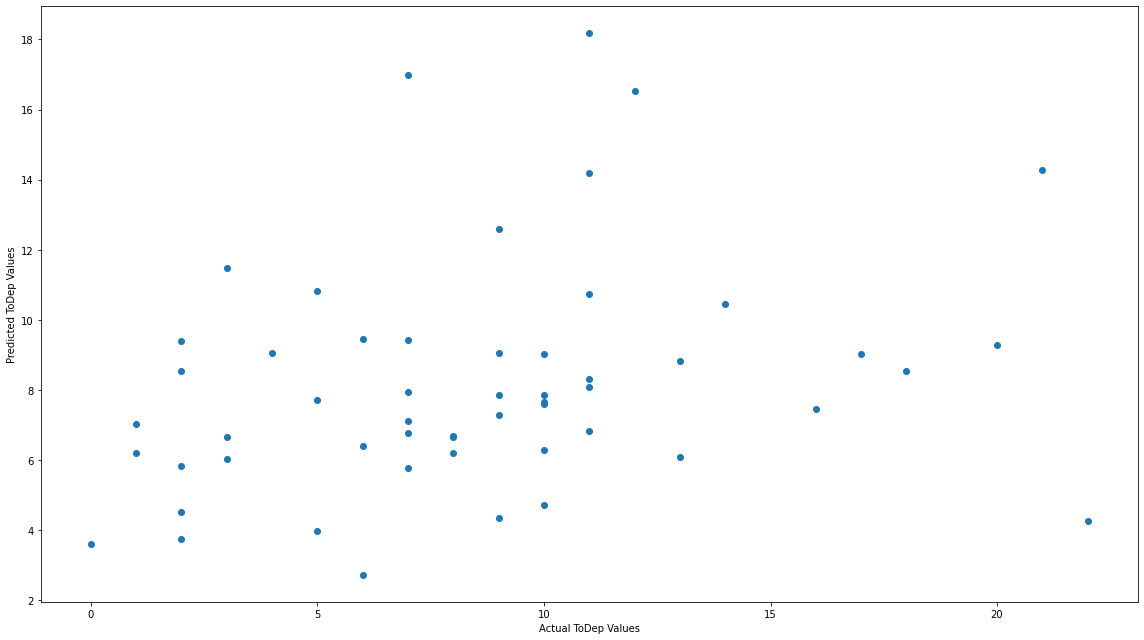

In [48]:
plt.figure(figsize=(16, 9))
plt.scatter(y_numeric_test, Randomforest_numerical_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()


### [Optional] Try other models
We've only tried DecisionTree and RandomForest, but there are a lot of models out there so it's worth to practise your modelling by giving them a try.

Feel free to replicate the code block below for different models.

In [ ]:
# Declare a variable to store the model

# Fit your train dataset

# Declare a variable and store your predictions that you make with your model using X test data

# Print the RMSE for y test and the predictions

# Plot a scatterplot between test and prediction values

### Step 11: Use the dummified category DataFrame as training data
Earlier, we used the numerical DataFrame as training data. Next, we'll try to see if our dummified categorical data is more useful in predicting ToDep.

Here, repeat Step 4. Don't drop anything and assign your categorical DataFrame as the independent variables.

We don't need to change the dependent variable since we're still predicting for 'ToDep'.

In [ ]:
# Step 11: Assign the categorical DataFrame to a variable

In [32]:
df_object.columns

Index(['Unnamed: 0', 'inter_dom_Inter', 'Region_JAP', 'Region_Others',
       'Region_SA', 'Region_SEA', 'Gender_Male', 'Academic_Under',
       'Stay_Cate_Medium', 'Stay_Cate_Short', 'Japanese_cate_High',
       'Japanese_cate_Low', 'English_cate_High', 'English_cate_Low',
       'Intimate_Yes', 'Religion_Yes', 'Suicide_Yes', 'Dep_Yes', 'DepType_No',
       'DepType_Other', 'DepSev_Min', 'DepSev_Mod', 'DepSev_ModSev',
       'DepSev_Sev', 'Partner_bi_Yes', 'Friends_bi_Yes', 'Parents_bi_Yes',
       'Relative_bi_Yes', 'Professional_bi_Yes', 'Phone_bi_Yes',
       'Doctor_bi_Yes', 'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes',
       'Internet_bi_Yes'],
      dtype='object')

In [34]:
X_object=df_object[df_object.columns.difference(['Unnamed: 0'])]

In [35]:
X_object

,Academic_Under,Alone_bi_Yes,DepSev_Min,DepSev_Mod,DepSev_ModSev,DepSev_Sev,DepType_No,DepType_Other,Dep_Yes,Doctor_bi_Yes,...,Region_Others,Region_SA,Region_SEA,Relative_bi_Yes,Religion_Yes,Stay_Cate_Medium,Stay_Cate_Short,Suicide_Yes,inter_dom_Inter,religion_bi_Yes
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
264,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,0
265,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
266,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


### Step 12: Split your data into train and test
Similarly, repeat Step 5 so that we can have a new set of train and test data.

In [ ]:
# Step 12: Split your variables into train and test sets

In [37]:
X_object_train,X_object_test,y_object_train,y_object_test=train_test_split(X_object,y_numeric,test_size= 0.2, random_state= 123)

### Step 13: Train a LinearRegression model
Okay, now that we're done, let's train and assess a LinearRegression.

In [ ]:
# Step 13a: Declare a variable to store the LinearRegression model

# Step 13b: Fit your train dataset

# Step 13c: Declare a variable and store your predictions that you make with your model using X test data

# Step 13d: Print the RMSE for y test and the predictions

# Step 13e: Plot a scatterplot between test and prediction values

In [38]:
Linear_regr=LinearRegression()
Linear_regr.fit(X_object_train,y_object_train)
Linear_object_predict=Linear_regr.predict(X_object_test)
print("Room Mean Squarred Error for Linear Regressor",np.sqrt(mean_squared_error(y_object_test,Linear_object_predict)))

Room Mean Squarred Error for Linear Regressor 1.2763796404168082


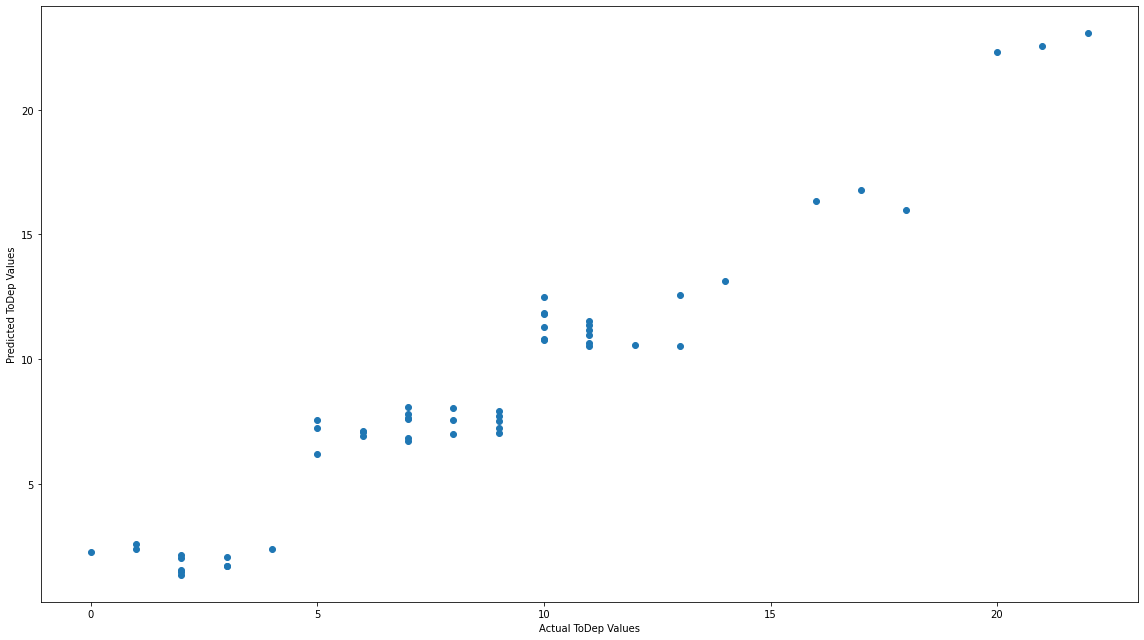

In [39]:
plt.figure(figsize=(16, 9))
plt.scatter(y_object_test, Linear_object_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 14: Drop values when preparing independent variables
You might have seen something like this from your plot:

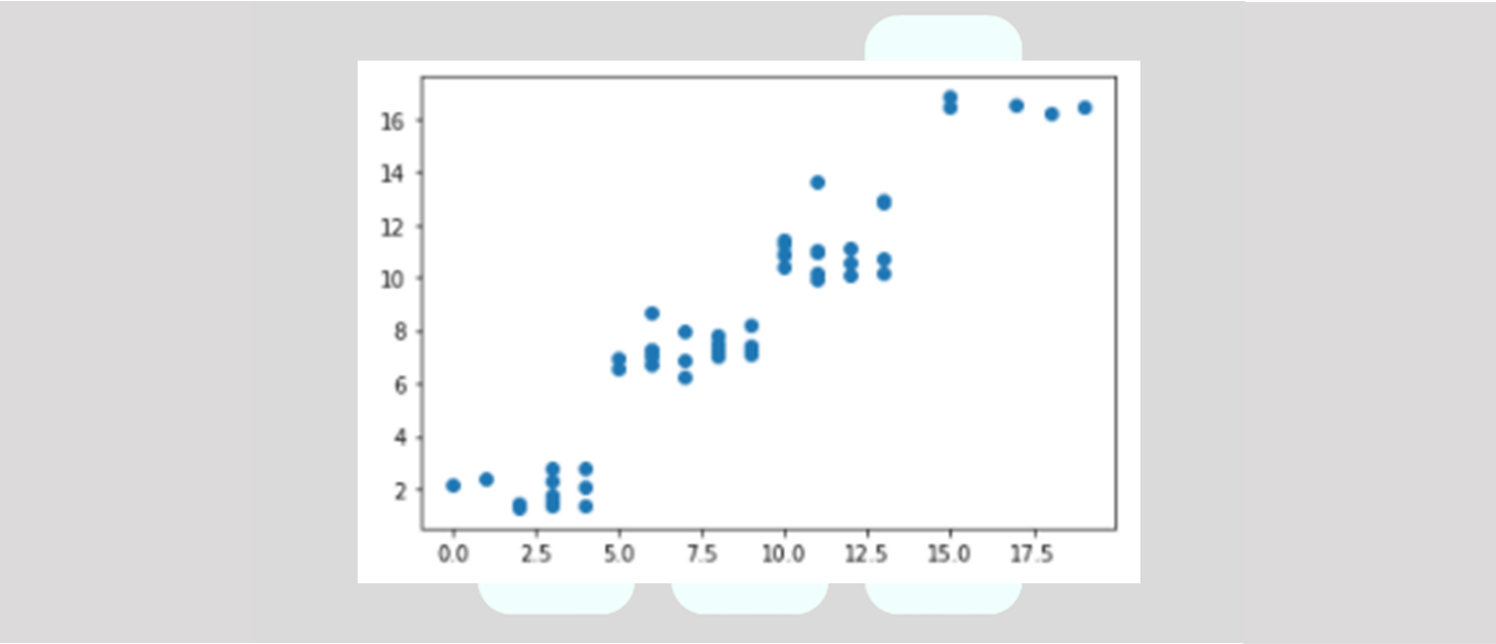

You might be impressed by your LinearRegression results. In fact, you gave RandomForest a try you'd be equally astounded because it's even better.

However, the reason why you're getting such good results is because when you prepared the dummified categorical variables, there was 'DepSev', which was related to 'ToDep'. We have Dep_Yes and DepType_Other and DepType_No which are also related to ToDep.

As such, there was 'peeking' involved since we used features that were derived from the dependent variable.

We will need to drop the following columns:
1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No

Prepare the independent variables again.

In [ ]:
# Step 15: Prepare the independent variables again

In [41]:
X_object_updated=df_object[['inter_dom_Inter', 'Region_JAP', 'Region_Others',
       'Region_SA', 'Region_SEA', 'Gender_Male', 'Academic_Under',
       'Stay_Cate_Medium', 'Stay_Cate_Short', 'Japanese_cate_High',
       'Japanese_cate_Low', 'English_cate_High', 'English_cate_Low',
       'Intimate_Yes', 'Religion_Yes', 'Suicide_Yes', 'Partner_bi_Yes', 'Friends_bi_Yes', 'Parents_bi_Yes',
       'Relative_bi_Yes', 'Professional_bi_Yes', 'Phone_bi_Yes',
       'Doctor_bi_Yes', 'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes',
       'Internet_bi_Yes']]

### Step 16: Repeat Steps 12 - 13
Let's split our data again, and go ahead with training with a LinearRegression

In [ ]:
# Step 16a: Split your independent and dependent variables into train and test 

# Step 16b: Declare a variable to store the LinearRegression model

# Step 16c: Fit your train dataset

# Step 16d: Declare a variable and store your predictions that you make with your model using X test data

# Step 16e: Print the RMSE for y test and the predictions

# Step 16f: Plot a scatterplot between test and prediction values

In [43]:
X_object_train,X_object_test,y_object_train,y_object_test=train_test_split(X_object_updated,y_numeric,test_size= 0.2, random_state= 123)

In [44]:
Linear_regr=LinearRegression()
Linear_regr.fit(X_object_train,y_object_train)
Linear_object_predict=Linear_regr.predict(X_object_test)
print("Room Mean Squarred Error for Linear Regressor",np.sqrt(mean_squared_error(y_object_test,Linear_object_predict)))

Room Mean Squarred Error for Linear Regressor 4.9803019070411105


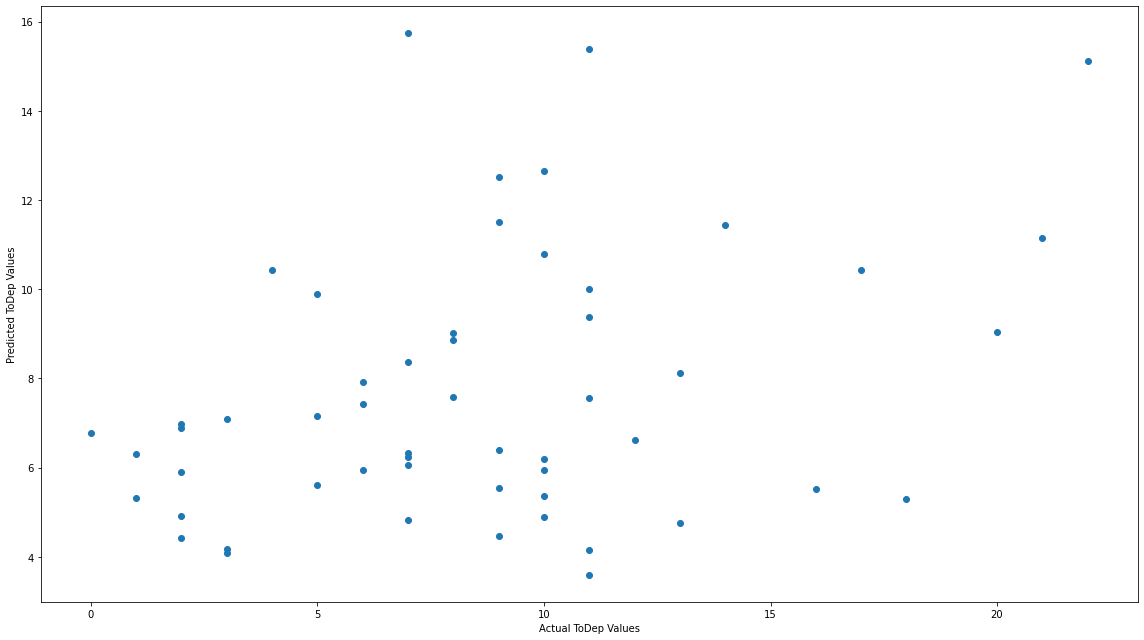

In [45]:
plt.figure(figsize=(16, 9))
plt.scatter(y_object_test, Linear_object_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 17: Train a DecisionTreeRegressor
Let's see if working with a DecisionTree makes it better.

In [ ]:
# Step 17a: Declare a variable to store the DecisionTreeRegressor

# Step 17b: Fit your train dataset

# Step 17c: Declare a variable and store your predictions that you make with your model using X test data

# Step 17d: Print the RMSE for y test and the predictions

# Step 17e: Plot a scatterplot between test and prediction values

In [46]:
Decisiontree_regr=DecisionTreeRegressor()
Decisiontree_regr.fit(X_object_train,y_object_train)
Decisiontree_object_predict=Decisiontree_regr.predict(X_object_test)
print("Room Mean Squarred Error for Decision Tree Regressor",np.sqrt(mean_squared_error(y_object_test,Decisiontree_object_predict)))

Room Mean Squarred Error for Decision Tree Regressor 6.078194176270157


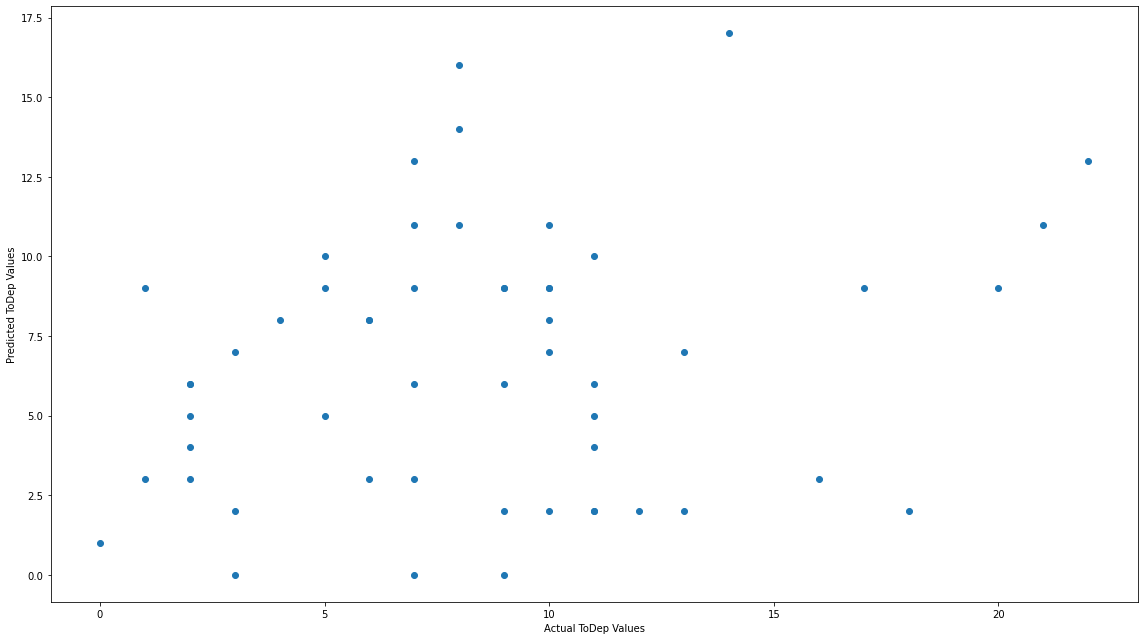

In [47]:
plt.figure(figsize=(16, 9))
plt.scatter(y_object_test, Decisiontree_object_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 18: Train a RandomForestRegressor

In [ ]:
# Step 18a: Declare a variable to store the RandomForestRegressor

# Step 18b: Fit your train dataset

# Step 18c: Declare a variable and store your predictions that you make with your model using X test data

# Step 18d: Print the RMSE for y test and the predictions

# Step 18e: Plot a scatterplot between test and prediction values

In [50]:
Randomforest_regr=RandomForestRegressor()
Randomforest_regr.fit(X_object_train,y_object_train)
Randomforest_object_predict=Randomforest_regr.predict(X_object_test)
print("Room Mean Squarred Error for Random Forest Regressor",np.sqrt(mean_squared_error(y_object_test,Randomforest_object_predict)))


C:\Users\sobee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Room Mean Squarred Error for Random Forest Regressor 4.89625927650883


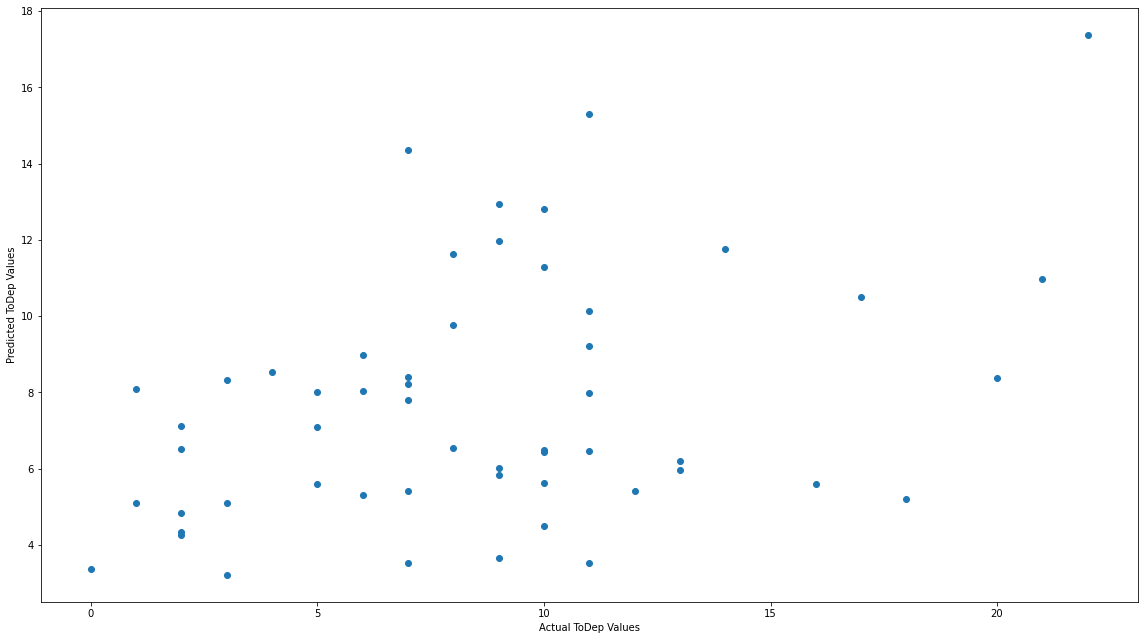

In [51]:
plt.figure(figsize=(16, 9))
plt.scatter(y_object_test, Randomforest_object_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 19: Use the full DataFrame with mix of numerical and dummified categorical variables
Seems like using the dummified variables by themselves didn't lead to a model that's too good.

Time to use the entire dataset, i.e. CSV with both numerical and dummified categorical variables.

Don't forget to drop:
1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No
8. ToDep
9. Age_cate

In [ ]:
# Step 19a: Prepare the independent variables again with the nine columns dropped

# Step 19b: Split your independent and dependent variables into train and test 

# Step 19c: Declare a variable to store the LinearRegression model

# Step 19d: Fit your train dataset

# Step 19e: Declare a variable and store your predictions that you make with your model using X test data

# Step 19f: Print the RMSE for y test and the predictions

# Step 19g: Plot a scatterplot between test and prediction values

In [52]:
df_final.columns

Index(['Unnamed: 0', 'Age', 'Age_cate', 'Stay', 'Japanese', 'English', 'ToDep',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet',
       'inter_dom_Inter', 'Region_JAP', 'Region_Others', 'Region_SA',
       'Region_SEA', 'Gender_Male', 'Academic_Under', 'Stay_Cate_Medium',
       'Stay_Cate_Short', 'Japanese_cate_High', 'Japanese_cate_Low',
       'English_cate_High', 'English_cate_Low', 'Intimate_Yes', 'Religion_Yes',
       'Suicide_Yes', 'Dep_Yes', 'DepType_No', 'DepType_Other', 'DepSev_Min',
       'DepSev_Mod', 'DepSev_ModSev', 'DepSev_Sev', 'Partner_bi_Yes',
       'Friends_bi_Yes', 'Parents_bi_Yes', 'Relative_bi_Yes',
       'Professional_bi_Yes', 'Phone_bi_Yes', 'Doctor_bi_Yes',
       'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes', 'Internet_bi_Yes'],
      dtype='object')

In [53]:
X_final=df_final[['Age', 'Stay', 'Japanese', 'English', 
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet',
       'inter_dom_Inter', 'Region_JAP', 'Region_Others', 'Region_SA',
       'Region_SEA', 'Gender_Male', 'Academic_Under', 'Stay_Cate_Medium',
       'Stay_Cate_Short', 'Japanese_cate_High', 'Japanese_cate_Low',
       'English_cate_High', 'English_cate_Low', 'Intimate_Yes', 'Religion_Yes',
       'Suicide_Yes', 'Partner_bi_Yes',
       'Friends_bi_Yes', 'Parents_bi_Yes', 'Relative_bi_Yes',
       'Professional_bi_Yes', 'Phone_bi_Yes', 'Doctor_bi_Yes',
       'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes', 'Internet_bi_Yes']]
y_final=df_final[['ToDep']]

In [54]:
X_final_train,X_final_test,y_final_train,y_final_test=train_test_split(X_final,y_final,test_size= 0.2, random_state= 123)

In [55]:
Linear_regr=LinearRegression()
Linear_regr.fit(X_final_train,y_final_train)
Linear_final_predict=Linear_regr.predict(X_final_test)
print("Room Mean Squarred Error for Linear Regressor",np.sqrt(mean_squared_error(y_final_test,Linear_final_predict)))

Room Mean Squarred Error for Linear Regressor 5.057409946978897


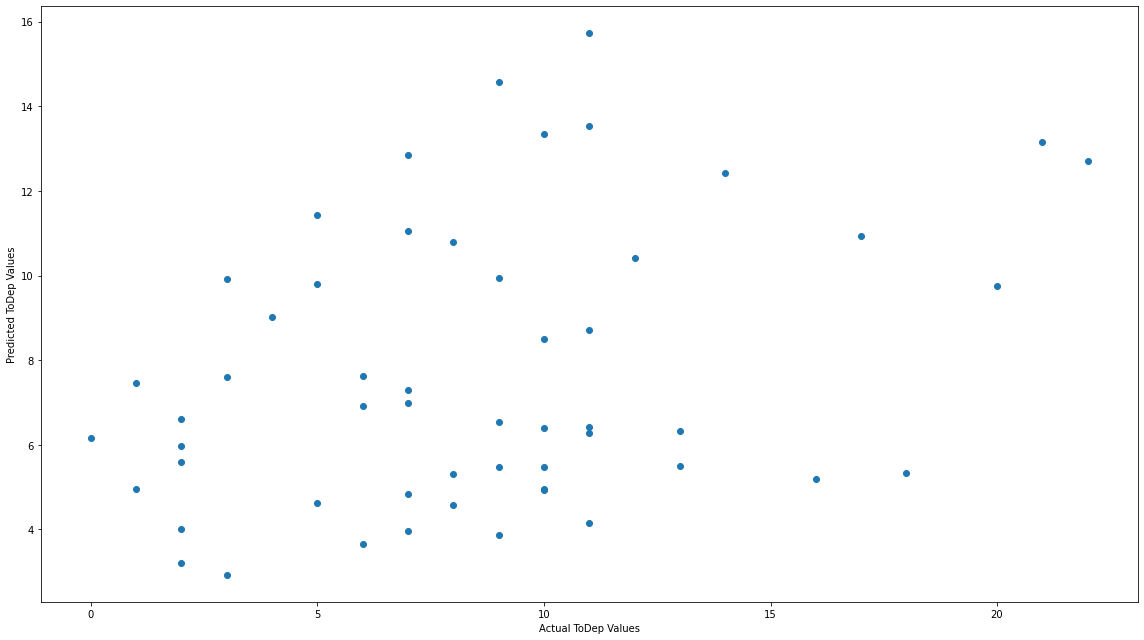

In [56]:
plt.figure(figsize=(16, 9))
plt.scatter(y_final_test, Linear_final_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

### Step 20: Repeat the training and testing with DecisionTreeRegressor/RandomForestRegressor
You know the drill - give DecisionTreeRegressor and RandomForestRegressor a try.

In [ ]:
# Step 20: Repeat the process with other models

In [57]:
Decisiontree_regr=DecisionTreeRegressor()
Decisiontree_regr.fit(X_final_train,y_final_train)
Decisiontree_final_predict=Decisiontree_regr.predict(X_final_test)
print("Room Mean Squarred Error for Decision Tree Regressor",np.sqrt(mean_squared_error(y_final_test,Decisiontree_final_predict)))

Room Mean Squarred Error for Decision Tree Regressor 5.39718719608924


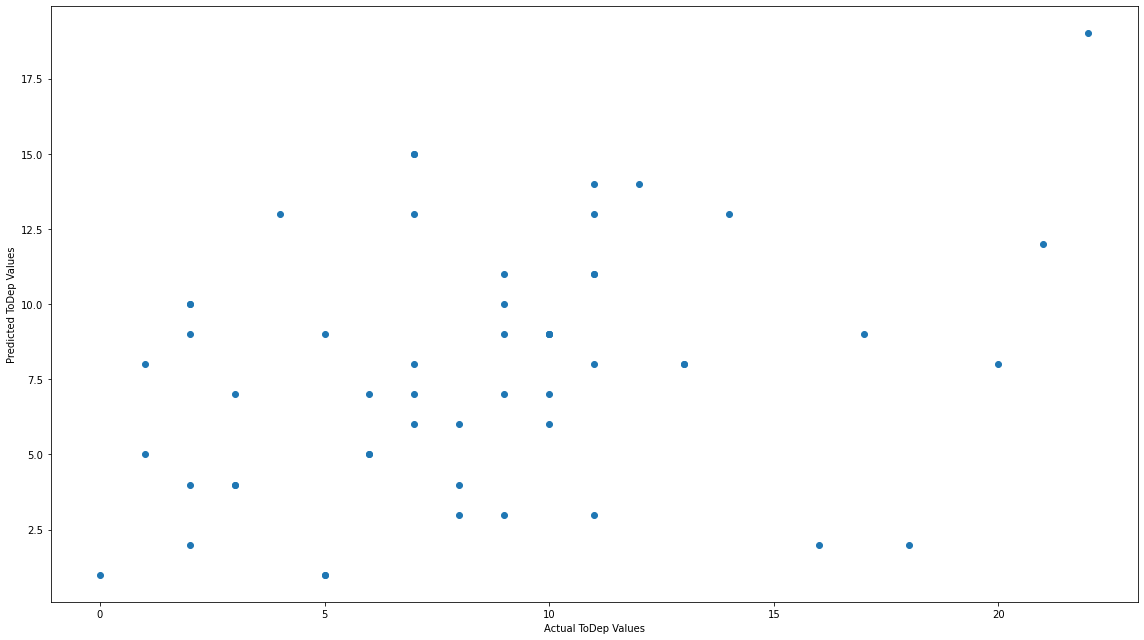

In [58]:
plt.figure(figsize=(16, 9))
plt.scatter(y_final_test, Decisiontree_final_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

In [59]:
Randomforest_regr=RandomForestRegressor()
Randomforest_regr.fit(X_final_train,y_final_train)
Randomforest_final_predict=Randomforest_regr.predict(X_final_test)
print("Room Mean Squarred Error for Random Forest Regressor",np.sqrt(mean_squared_error(y_final_test,Randomforest_final_predict)))


C:\Users\sobee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Room Mean Squarred Error for Random Forest Regressor 4.592095462938542


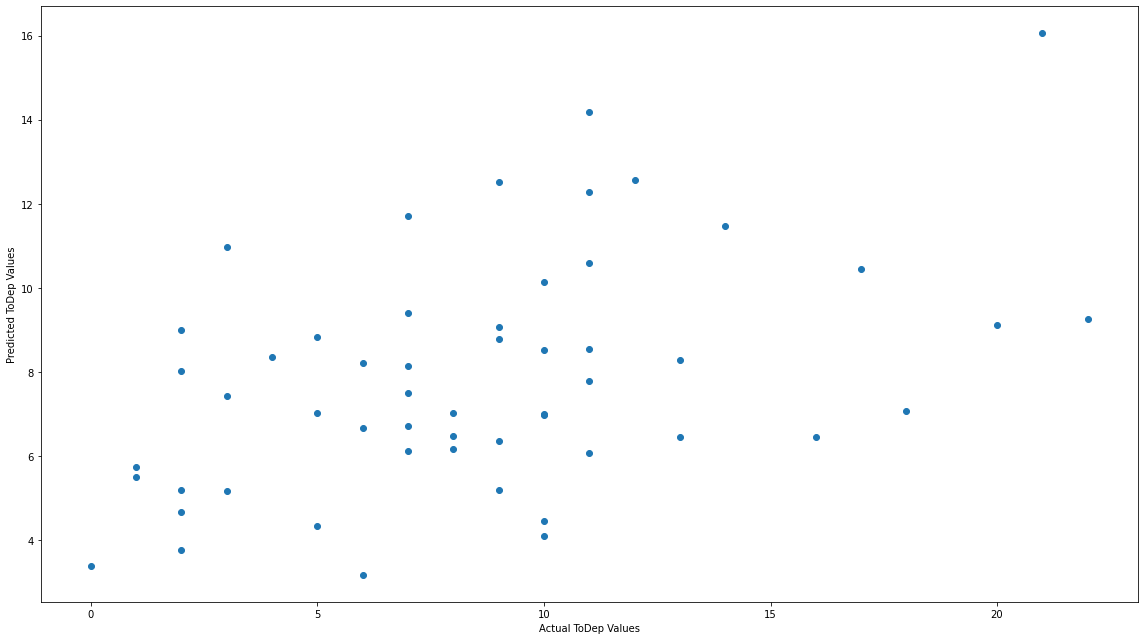

In [60]:
plt.figure(figsize=(16, 9))
plt.scatter(y_final_test, Randomforest_final_predict)
plt.axis('tight')
plt.xlabel('Actual ToDep Values')
plt.ylabel('Predicted ToDep Values')
plt.tight_layout()

## Machine learning modelling (Classification)
As you work through the dataset, you might be wondering what you're predicting for exactly. 

Sure, we were predicting for ToDep, which was the total score of depression that a student has. However, are we predicting for the right thing?

Let's reframe the question a little and look at another important feature - 'Suicide'. 

'Suicide' is a binary category that refers to whether a student has had suicide ideation in the past 2 weeks. This is important since if we can predict for this we can stop students from potentially acting on the ideation. 

In this part, we will <strong>not</strong> predict for ToDep, and see how we can predict for 'Suicide_Yes' - the dummified column for the original feature.

### Step 21: Import machine learning libraries for classification
Let's import the libraries and methods required for classification.
1. DummyClassifier - sklearn.dummy
2. DecisionTreeClassifier - sklearn.tree
3. RandomForestClassifier - sklearn.ensemble
4. f1_score - sklearn.metrics
5. confusion_matrix - sklearn.metrics

We'll be using the f1_score and confusion_matrix to evaluation our classification. The higher the f1_score the better performing our classifier is. 

We'll talk a bit about the confusion matrix after.

In [ ]:
# Step 21: Import the machine learning libraries and methods

In [61]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Step 22: Prepare the independent and dependent variables
Let's assume the following:
1. You can only get general information about the student without taking extensive tests - no ToAS, ToDP, and other test results
2. We'll be predicting for Suicide_Yes, i.e. the dependent variable

Consideration 1 is important because we want to see if we can catch a student who's had suicide ideation without getting him/her to do too many tests. 

For independent variables, let's take everything except the following:
1. Age_cate
2. ToDep
3. ToSC
4. ToAS
5. Suicide_Yes

For dependent variable, let's use 'Suicide_Yes'

In [ ]:
# Step 22: Prepare the independent and dependent variables

In [62]:
df_final.columns

Index(['Unnamed: 0', 'Age', 'Age_cate', 'Stay', 'Japanese', 'English', 'ToDep',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet',
       'inter_dom_Inter', 'Region_JAP', 'Region_Others', 'Region_SA',
       'Region_SEA', 'Gender_Male', 'Academic_Under', 'Stay_Cate_Medium',
       'Stay_Cate_Short', 'Japanese_cate_High', 'Japanese_cate_Low',
       'English_cate_High', 'English_cate_Low', 'Intimate_Yes', 'Religion_Yes',
       'Suicide_Yes', 'Dep_Yes', 'DepType_No', 'DepType_Other', 'DepSev_Min',
       'DepSev_Mod', 'DepSev_ModSev', 'DepSev_Sev', 'Partner_bi_Yes',
       'Friends_bi_Yes', 'Parents_bi_Yes', 'Relative_bi_Yes',
       'Professional_bi_Yes', 'Phone_bi_Yes', 'Doctor_bi_Yes',
       'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes', 'Internet_bi_Yes'],
      dtype='object')

In [64]:
X_classify=df_final[['Age',  'Stay', 'Japanese', 'English',
        'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
        'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet',
       'inter_dom_Inter', 'Region_JAP', 'Region_Others', 'Region_SA',
       'Region_SEA', 'Gender_Male', 'Academic_Under', 'Stay_Cate_Medium',
       'Stay_Cate_Short', 'Japanese_cate_High', 'Japanese_cate_Low',
       'English_cate_High', 'English_cate_Low', 'Intimate_Yes', 'Religion_Yes',
        'Dep_Yes', 'DepType_No', 'DepType_Other', 'DepSev_Min',
       'DepSev_Mod', 'DepSev_ModSev', 'DepSev_Sev', 'Partner_bi_Yes',
       'Friends_bi_Yes', 'Parents_bi_Yes', 'Relative_bi_Yes',
       'Professional_bi_Yes', 'Phone_bi_Yes', 'Doctor_bi_Yes',
       'religion_bi_Yes', 'Alone_bi_Yes', 'Others_bi_Yes', 'Internet_bi_Yes']]
y_classify=df_final[['Suicide_Yes']]

### Step 23: Split your data into train and test
We'll split our data in a 80/20 split, and make sure you stratify by y since we want to have y that is proportional in both datasets.

In [ ]:
# Step 23: Split your data

In [65]:
X_classify_train,X_classify_test,y_classify_train,y_classify_test=train_test_split(X_classify,y_classify,test_size= 0.2, random_state= 123)

### Step 24: Train and test a DummyClassifier model
Let's set a baseline to our classification model using a DummyClassifier.

We'll print an f1_score, and a confusion matrix after.

In [ ]:
# Step 24a: Declare a variable to store the LinearRegression model

# Step 24b: Fit your train dataset

# Step 24c: Declare a variable and store your predictions that you make with your model using X test data

# Step 24d: Print the RMSE for y test and the predictions

# Step 24e: Plot a scatterplot between test and prediction values

In [66]:
dummy_class=DummyClassifier()
dummy_class.fit(X_classify_train,y_classify_train)
dummy_class_predict=dummy_class.predict(X_classify_test)

C:\Users\sobee\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [67]:
confusion_matrix(y_classify_test, dummy_class_predict)

array([[34, 10],
       [ 8,  2]], dtype=int64)

In [68]:
f1_score(y_classify_test, dummy_class_predict, average=None)

array([0.79069767, 0.18181818])

Let's unpack the dummy classifier result, and assess what we're looking for when we look at the confusion matrix. 

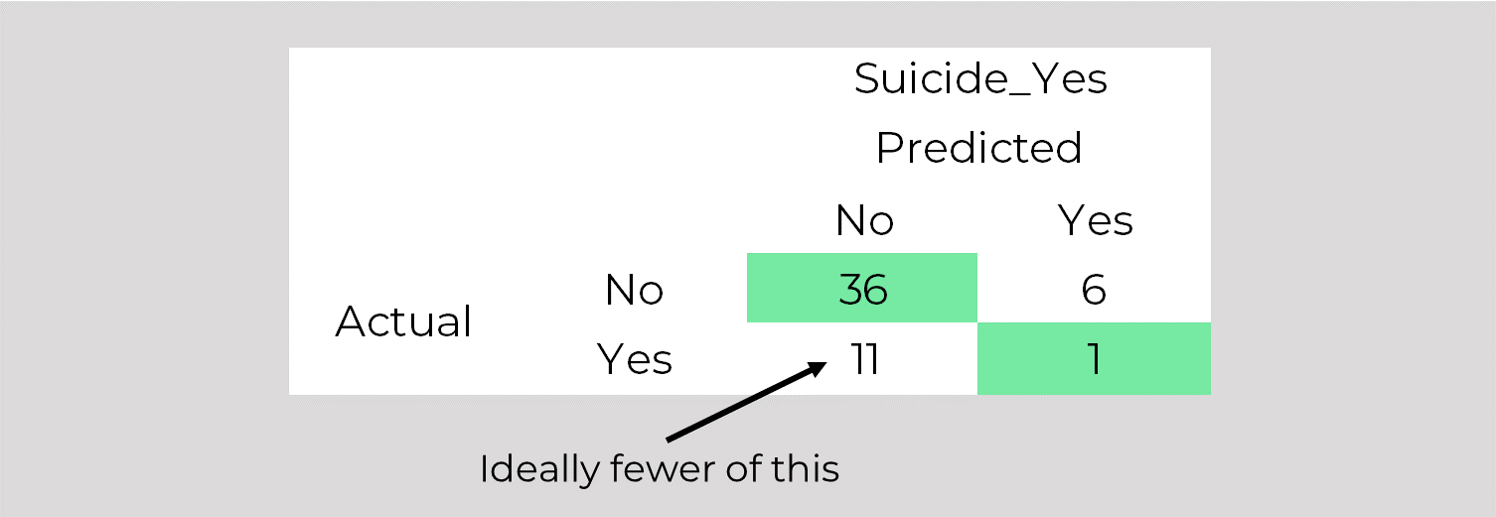

This is an example of the output from the confusion matrix from the DummyClassifier results. 

Ideally, we should predict less false negatives and more true positives since that's impactful. 

On the other hand, false positives aren't that bad compared to missing out true positives since it's just a nuisance for the student involved if he/she is falsely predicted to have suicide ideation.

### Step 25: Train and test a DecisionTreeClassifier
Similarly, train and test a DecisionTreeClassifier to see if we can perform better. 

In [ ]:
# Step 25: Train and test a DecisionTreeClassifier

In [69]:
DecisionTree_class=DecisionTreeClassifier()
DecisionTree_class.fit(X_classify_train,y_classify_train)
DecisionTree_class_predict=DecisionTree_class.predict(X_classify_test)

In [70]:
confusion_matrix(y_classify_test, DecisionTree_class_predict)

array([[38,  6],
       [ 6,  4]], dtype=int64)

In [71]:
f1_score(y_classify_test, DecisionTree_class_predict, average=None)

array([0.86363636, 0.4       ])

### Step 26: Train and test a RandomForestClassifier
Disclaimer - your RandomForestClassifier may perform worse than a DecisionTree, and that's ok.

In [ ]:
# Step 26: Train and test a RandomForestClassifier

In [72]:
Randomforest_class=RandomForestClassifier()
Randomforest_class.fit(X_classify_train,y_classify_train)
Randomforest_class_predict=Randomforest_class.predict(X_classify_test)

C:\Users\sobee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [73]:
confusion_matrix(y_classify_test, Randomforest_class_predict)

array([[40,  4],
       [ 6,  4]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_classify_test,Randomforest_class_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.50      0.40      0.44        10

    accuracy                           0.81        54
   macro avg       0.68      0.65      0.67        54
weighted avg       0.80      0.81      0.81        54



### Step 27: Try other models to improve prediction
At this juncture, please feel free to experiment with other models to see if you can improve your prediction results.

In [ ]:
# Step 27: Try other models 

# The end
And that's the end! This was a very long notebook, but we're glad you're done. You should have obtained a model that does slightly better than DummyClassifier, and don't be discouraged! 

Imagine if you deployed the model in a university, and were able to identify and help students at risk. That'd be pretty awesome wouldn't it?

To recap, you've:
1. Collected data from a research team
2. Cleaned the data
3. Explored the data through visualization
4. Conducted statistical testing and tested hypotheses
5. Trained a machine learning model to predicted total depression score of a university student
6. Learned to reframe a machine learning problem
7. Trained a separate machine learning model to predict suicide ideation

This is a meaningful project, we hope you found this project as enjoyable as we did guiding you through it. 

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning as well. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG